# Data Importing and Data Cleaning

In [1]:
!pip install pandas matplotlib seaborn textblob wordcloud

In [2]:
import json
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm, tqdm_notebook, tnrange

# Display Settings

pd.set_option('display.max_columns', 50)

# Importing Yelp Business JSON File

In [3]:
# Importing Yelp Business JSON File

business = []

with open("E:/Pace/yelp_academic_dataset_business.json", encoding='utf-8') as f:
    for line in f:
        business.append(json.loads(line))

# Length of rows of Data

len(business)  

150346

In [4]:
# Overview of columns of each entry of business file

business[5]

{'business_id': 'CF33F8-E6oudUQ46HnavjQ',
 'name': 'Sonic Drive-In',
 'address': '615 S Main St',
 'city': 'Ashland City',
 'state': 'TN',
 'postal_code': '37015',
 'latitude': 36.269593,
 'longitude': -87.058943,
 'stars': 2.0,
 'review_count': 6,
 'is_open': 1,
 'attributes': {'BusinessParking': 'None',
  'BusinessAcceptsCreditCards': 'True',
  'RestaurantsAttire': "u'casual'",
  'OutdoorSeating': 'True',
  'RestaurantsReservations': 'False',
  'Caters': 'False',
  'RestaurantsTakeOut': 'True',
  'Alcohol': "u'none'",
  'Ambience': 'None',
  'GoodForKids': 'True',
  'RestaurantsPriceRange2': '1',
  'ByAppointmentOnly': 'False',
  'CoatCheck': 'False',
  'DogsAllowed': 'False',
  'RestaurantsTableService': 'False',
  'RestaurantsGoodForGroups': 'True',
  'RestaurantsDelivery': 'True',
  'WiFi': "u'no'",
  'WheelchairAccessible': 'True',
  'HasTV': 'True',
  'HappyHour': 'False',
  'DriveThru': 'True',
  'BikeParking': 'False'},
 'categories': 'Burgers, Fast Food, Sandwiches, Food, Ice

In [5]:
# Now that we know the column names of this file, we now can proceed to create our dataframe for this file.

In [6]:
## Creating Dataframe for business json file

# Creating Columns for our Dataframe

business_id = []
name = []
city = []
state = []
stars = []
review_count = []
categories = []
postal_code = []
latitude = []
longitude = []
pricerange = []
is_open = []

# Iterating through each row of the json file

for entry in range(0, len(business)): 
        business_id.append(business[entry]['business_id'])
        name.append(business[entry]['name'])
        city.append(business[entry]['city'])
        state.append(business[entry]['state'])
        stars.append(business[entry]['stars'])
        postal_code.append(business[entry]['postal_code'])
        review_count.append(business[entry]['review_count'])
        categories.append(business[entry]['categories'])
        latitude.append(business[entry]['latitude'])
        longitude.append(business[entry]['longitude'])
        is_open.append(business[entry]['is_open'])


business = {'business_id ':business_id,'name':name,'city':city,'state':state,'stars':stars,'review_count':review_count,
        'categories':categories,'latitude':latitude,'longitude':longitude,'is_open':is_open, 'postal_code':postal_code}

business_df  = pd.DataFrame(business)

# Overview of our Business Dataframe

print(business_df.shape) 
business_df.head()

(150346, 11)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop...",34.426679,-119.711197,0,93101
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,3.0,15,"Shipping Centers, Local Services, Notaries, Ma...",38.551126,-90.335695,1,63123
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,3.5,22,"Department Stores, Shopping, Fashion, Home & G...",32.223236,-110.880452,0,85711
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",39.955505,-75.155564,1,19107
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,4.5,13,"Brewpubs, Breweries, Food",40.338183,-75.471659,1,18054


In [7]:
# Overview of Business/Restaurant Categories

business_categories = business_df.assign(categories = business_df.categories.str.split(', ')).explode('categories')

print(str('The number of business categories is:'), len(business_categories))

# Most Common Business Categories

business_categories.categories.value_counts().head(25)

The number of business categories is: 668695


categories
Restaurants                  52268
Food                         27781
Shopping                     24395
Home Services                14356
Beauty & Spas                14292
Nightlife                    12281
Health & Medical             11890
Local Services               11198
Bars                         11065
Automotive                   10773
Event Planning & Services     9895
Sandwiches                    8366
American (Traditional)        8139
Active Life                   7687
Pizza                         7093
Coffee & Tea                  6703
Fast Food                     6472
Breakfast & Brunch            6239
American (New)                6097
Hotels & Travel               5857
Home & Garden                 5799
Fashion                       5739
Burgers                       5636
Arts & Entertainment          5434
Auto Repair                   5433
Name: count, dtype: int64

In [8]:
# For this Project, we are only focusing on Restaurant and F&B Businesses. 
# As such, we will be restricting the categories that businesses can contain in our filtered dataset. 
# Based on the above Information, we will be restricting these broad categories to: `Restaurants`, `Fast Food`, `Breakfast & Brunch`, `Cafes`.

In [9]:
# Filtering for Restaurant Food Businesses

business_food = business_df[business_df['categories'].str.contains('Restaurants|Fast Food|Breakfast & Brunch|Cafes',
                case=False, na=False)]

# Filtering only for Restaurants that are still open for business, open = 1, closed = 0

business_food = business_food[business_food['is_open']==1]
business_food.head()

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",39.955505,-75.155564,1,19107
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",36.269593,-87.058943,1,37015
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",36.208102,-86.768170,1,37207
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,FL,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks",27.955269,-82.456320,1,33602
12,il_Ro8jwPlHresjw9EGmBg,Denny's,Indianapolis,IN,2.5,28,"American (Traditional), Restaurants, Diners, B...",39.637133,-86.127217,1,46227


In [10]:
# Checking how many rows of data we have left: 
business_food.shape

(35026, 11)

Top 10 Reviewed Businesses:
business_id
_ab50qdWOk0DdB6XOrBitw    7673
ac1AeYqs8Z4_e2X5M3if2A    7516
GXFMD0Z4jEVZBCsbPf4CTQ    6160
ytynqOUb3hjKeJfRj5Tshw    5778
oBNrLz4EDhiscSlbOl8uAw    5264
iSRTaT9WngzB8JJ2YKJUig    5254
VQcCL9PiNL_wkGf-uF3fjg    5146
_C7QiQQc47AOEv4PE3Kong    4969
GBTPC53ZrG1ZBY3DT8Mbcw    4661
6a4gLLFSgr-Q6CZXDLzBGQ    4480
Name: count, dtype: int64


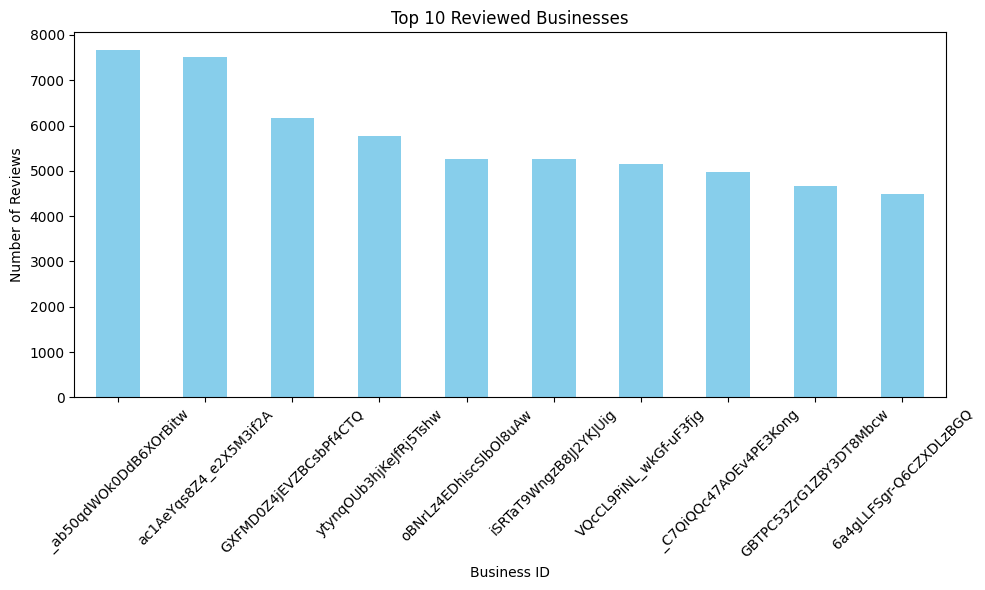

In [11]:
# Define chunk size for reading the JSON file
chunk_size = 100000

# Initialize an empty DataFrame to store the review data
review_chunks = []

# Read the JSON file in chunks
for chunk in pd.read_json("E:/Pace/yelp_academic_dataset_review.json", lines=True, chunksize=chunk_size):
    review_chunks.append(chunk)

# Concatenate the chunks into a single DataFrame
filtered_review = pd.concat(review_chunks)

# Calculate the distribution of reviews for each business
business_distribution = filtered_review['business_id'].value_counts()

# Get the top 10 reviewed businesses
top_10_businesses = business_distribution.head(10)

# Display the top 10 reviewed businesses
print("Top 10 Reviewed Businesses:")
print(top_10_businesses)

# Plot the distribution of reviews for the top 10 businesses
plt.figure(figsize=(10, 6))
top_10_businesses.plot(kind='bar', color='skyblue')
plt.title('Top 10 Reviewed Businesses')
plt.xlabel('Business ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Deciding which city to focus on
# Top States that have the most number of Restaurant Businesses in this dataset

top_states = business_food['state'].value_counts().head(10)
top_states

state
PA    8078
FL    5925
TN    3033
IN    2838
MO    2726
NJ    2416
LA    2347
AZ    1805
AB    1738
NV    1076
Name: count, dtype: int64

In [13]:
# Top Cities that have the most number of Restaurant Businesses in this dataset

top_cities = business_food['city'].value_counts().head(40)
top_cities

city
Philadelphia        3529
Tampa               1966
Indianapolis        1905
Nashville           1683
Tucson              1641
Edmonton            1557
New Orleans         1393
Saint Louis          959
Reno                 797
Boise                603
Santa Barbara        448
Wilmington           437
Clearwater           436
St. Louis            410
Metairie             350
Franklin             302
Saint Petersburg     300
St. Petersburg       253
Sparks               240
Meridian             236
Brandon              227
Largo                206
Cherry Hill          193
West Chester         186
Carmel               176
New Port Richey      166
Riverview            159
Kenner               156
Greenwood            150
Trenton              145
Fishers              140
Lutz                 135
Smyrna               131
Dunedin              130
Palm Harbor          129
Brentwood            129
Hendersonville       127
Florissant           127
Pinellas Park        123
Wesley Chapel       

In [14]:
# Philadelphia has the most number of Restaurant Businesses in this dataset.

In [15]:
# Keeping the New Jersey

states_to_keep = ['NJ']
business_food = business_food[business_food.state.isin(states_to_keep)]

# Overview of Cities in New Jersey 
business_food['city'].value_counts().head(20)

city
Cherry Hill     193
Trenton         145
Marlton          85
Mount Laurel     78
Burlington       61
Sicklerville     61
Sewell           60
Glassboro        56
Medford          52
Camden           51
Pennsauken       46
Voorhees         45
Ewing            43
Collingswood     40
Williamstown     38
Moorestown       37
Lambertville     37
Mount Holly      37
Haddonfield      36
Blackwood        36
Name: count, dtype: int64

In [16]:
# Checking how many rows of data we have left: 

business_food.shape

(2416, 11)

In [17]:
# Checking for null values

business_food.isnull().sum()

business_id     0
name            0
city            0
state           0
stars           0
review_count    0
categories      0
latitude        0
longitude       0
is_open         0
postal_code     0
dtype: int64

# Review File

In [18]:
# Importing Review JSON File

reviews = []

with open("E:/Pace/yelp_academic_dataset_review.json", encoding='utf-8') as f:
    for line in f:
        reviews.append(json.loads(line))


# Length of rows of Data        

len(reviews)

6990280

In [19]:
# Overview of columns of each entry of the Review file

reviews[10]

{'review_id': 'rGQRf8UafX7OTlMNN19I8A',
 'user_id': '1WHRWwQmZOZDAhp2Qyny4g',
 'business_id': 'uMvVYRgGNXf5boolA9HXTw',
 'stars': 5.0,
 'useful': 2,
 'funny': 0,
 'cool': 0,
 'text': "My experience with Shalimar was nothing but wonderful. \nI wanted to get my engagement ring sized and was told over the phone that it could probably be done within the day. \nWhen I brought it by, the team confirmed that the jeweler would be able to accommodate my same-day request and that it would be around $40 (simple band, decrease by three full sizes).\nI checked my size one more time, confirmed, and left to let them do their thing.\nWhen I came to pick up later that afternoon, the ring was too small. It's very important to note that Shalimar sized the ring perfectly, but that I made a mistake and should've gone up a half-size.\nThe Shalimar group were completely understanding and accommodating, even resizing my ring back up and getting it back to me within an hour at no charge! Even though it was my 

In [20]:
## Creating Dataframe for review json file

# Creating Columns for Dataframe

reviewid = []
businessid= []
userid = []
stars = []
useful = []
funny = []
cool = []
text = []
date = []

# Iterating through each row of the json file

for entry in range(0, len(reviews)):     
    reviewid.append(reviews[entry]['review_id'])
    businessid.append(reviews[entry]['business_id'])
    userid.append(reviews[entry]['user_id'])
    stars.append(reviews[entry]['stars'])
    text.append(reviews[entry]['text'])
    date.append(reviews[entry]['date'])
    useful.append(reviews[entry]['useful'])
    funny.append(reviews[entry]['funny'])
    cool.append(reviews[entry]['cool'])
    
reviews = {'review_id':reviewid,'business_id':businessid,'user_id':userid,'stars':stars,'useful':useful,'funny':funny,
           'cool':cool,'text':text,'date':date}

reviews_df  = pd.DataFrame(reviews)

# Overview of our Review Dataframe

print(reviews_df.shape)
reviews_df.head()

(6990280, 9)


,review_id,business_id,user_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,mh_-eMZ6K5RLWhZyISBhwA,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,OyoGAe7OKpv6SyGZT5g77Q,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,_7bHUi9Uuf5__HHc_Q8guQ,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,bcjbaE6dDog4jkNY91ncLQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [21]:
# Splitting Date Column into Year, Month and Time Columns

def create_yr(x): 
    return x.split('-')[0] 

def create_mth(x): 
    return x.split('-')[1] 

def create_time(x):
    return x.split(' ')[1]

reviews_df['year'] = reviews_df.date.apply(create_yr)
reviews_df['month'] = reviews_df.date.apply(create_mth)
reviews_df['time'] = reviews_df.date.apply(create_time)

# Overview of new df with 3 new columns

reviews_df.head()

,review_id,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,mh_-eMZ6K5RLWhZyISBhwA,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018,07,22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,OyoGAe7OKpv6SyGZT5g77Q,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2012,01,15:28:18
2,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,02,20:30:30
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,_7bHUi9Uuf5__HHc_Q8guQ,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,01,00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,bcjbaE6dDog4jkNY91ncLQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2017,01,20:54:15


In [22]:
# Checking how many rows and columns of data we have

reviews_df.shape

(6990280, 12)

In [23]:
# Filtered Reviews Dataset in New Jersey


In [24]:
## Combining Business and Reviews Datasets
# Creating a new column for each business's unique ids

business_food['key'] = business_food.iloc[:,0]

# Keeping only the reviews for the restaurants in our selected dataset

restaurant_reviews = reviews_df[reviews_df['business_id'].isin(business_food['key'])]
restaurant_reviews = restaurant_reviews.reset_index().iloc[:,2:]
print(restaurant_reviews.shape)
restaurant_reviews.head() 

(139976, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,7wQEzj-0yOpLiANNLuUflQ,GtqEcbHF-WTfKlms9250ZQ,4.0,1,0,0,Excellent service! Great diner food and breakf...,2016-10-26 16:35:21,2016,10,16:35:21
1,c5QMFe_yhgksThaR2a6rtg,n6rI5T6klu0KCz0q2tS9Ng,3.0,0,0,0,Really good burger. I had the Bourbon Black an...,2014-07-28 02:02:00,2014,07,02:02:00
2,hy5GpGXAna-5qrb3zNub6g,ubOMW9s0Bhi_GGPeG8Uq7g,5.0,0,1,0,Eat here at least 2 times a week. Servers are ...,2017-03-27 03:03:53,2017,03,03:03:53
3,W2mcChlYqeVirWSWSLgoDA,lbDYppQgGowSJIeD3xS4eA,3.0,0,0,0,It's no different than any other Chinese place...,2016-01-17 20:40:20,2016,01,20:40:20
4,SlLfWzeYOrVBxCd-0QILZQ,FLGFtGbXaUo0obR6lnZA1Q,5.0,2,0,1,My 2nd experience here was even better than th...,2017-02-19 21:43:00,2017,02,21:43:00


In [25]:
restaurant_reviews.shape

(139976, 11)

In [26]:
# Number of Unique Users in this Reviews Dataset

n_users = len(restaurant_reviews.user_id.unique())
n_users 

59531

In [27]:
# Sort Restaurant Reviews by Year

restaurant_sorted = restaurant_reviews.sort_values(by='year', ascending=True)
restaurant_sorted.head()

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
13960,lPB_ZBXjLmV7qaPL9t0DTA,CMBYyVy2Rwb_saUkY5kZaQ,5.0,7,0,0,"This is the best diner I've been to. In fact, ...",2005-12-09 05:21:58,2005,12,05:21:58
126178,oQ_SoB3-57wqGETW_K6AtQ,X5EAMkKCHTpmso9ILIFRUg,5.0,3,1,3,Norma's is absolutely my FAVORITE RESTAURANT E...,2006-08-18 22:37:11,2006,08,22:37:11
125638,xicrRwfMBkDfQlFaGoyC5g,tiLm3eFfpxhwV6O9DEaneQ,5.0,3,1,2,"this place is great. the food is fresh, the s...",2006-08-19 22:18:41,2006,08,22:18:41
37051,4PgNs7K7gGfGqXNHwAgyzQ,KeuhteHe76DxDlXnkWoDwA,3.0,1,1,1,"Oh, Dance Assembly. For everyone in the world ...",2006-06-13 04:02:31,2006,06,04:02:31
83895,8mSY98peCMoPaHcUhfeo9A,gfQqQYI5_hCAGEHlHXIz2Q,4.0,1,0,1,Used to go here often as a kid. Typical diner...,2006-01-31 01:37:37,2006,01,01:37:37


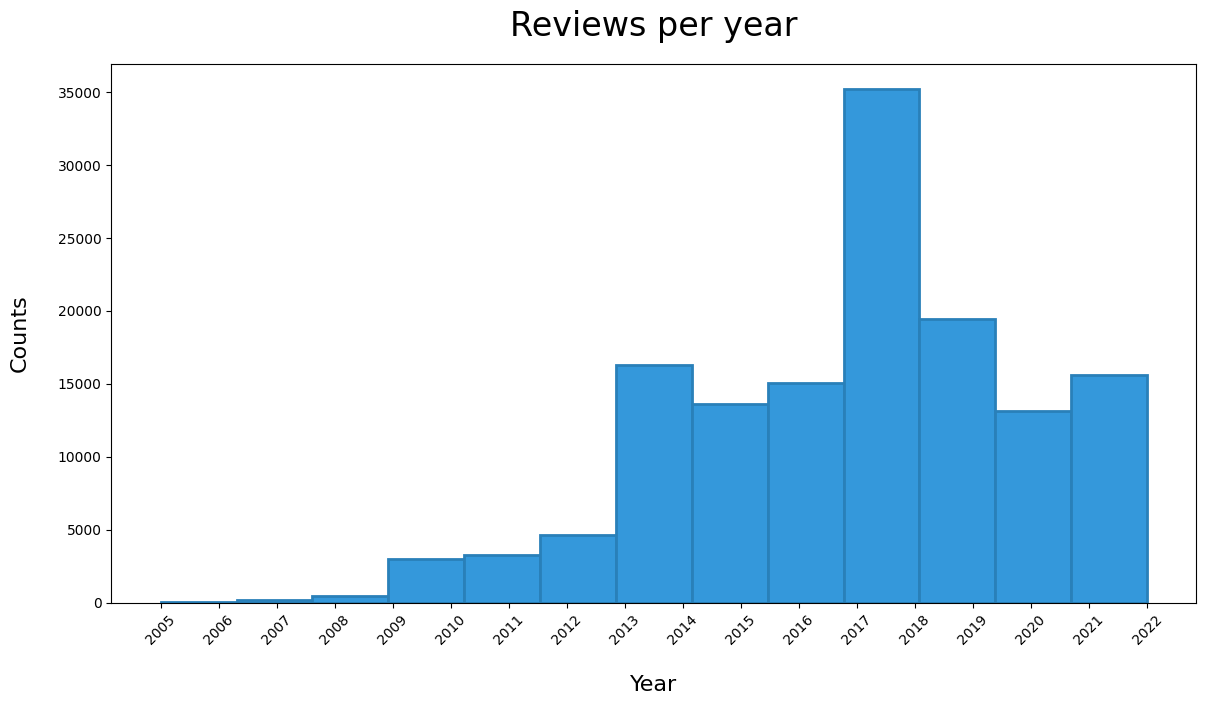

In [28]:
# Histogram plot of Restaurant Reviews per Year

def make_histogram(dataset, attribute, bins=13, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2) 
    plt.xticks(rotation=45)
    
make_histogram(restaurant_sorted, 'year', title='Reviews per year', xlab='Year', ylab='Counts')

In [29]:
# The histogram has a right-skewed distribution with the majority of reviews being in the last 10 years of the dataset (2013-2022). 
# For the purpose of this Capstone Project, I will only be analyzing reviews from the past 10 years.

In [30]:
# Filtering for Restaurant/Food Reviews from 2013-2022

restaurant_reviews['year'] = restaurant_reviews['year'].astype(int)
restaurant_reviews = restaurant_reviews[restaurant_reviews['year'] >= 2013]

# Overview of our Final Reviews Dataset

print(restaurant_reviews.shape)
restaurant_reviews.head()

(128362, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,7wQEzj-0yOpLiANNLuUflQ,GtqEcbHF-WTfKlms9250ZQ,4.0,1,0,0,Excellent service! Great diner food and breakf...,2016-10-26 16:35:21,2016,10,16:35:21
1,c5QMFe_yhgksThaR2a6rtg,n6rI5T6klu0KCz0q2tS9Ng,3.0,0,0,0,Really good burger. I had the Bourbon Black an...,2014-07-28 02:02:00,2014,07,02:02:00
2,hy5GpGXAna-5qrb3zNub6g,ubOMW9s0Bhi_GGPeG8Uq7g,5.0,0,1,0,Eat here at least 2 times a week. Servers are ...,2017-03-27 03:03:53,2017,03,03:03:53
3,W2mcChlYqeVirWSWSLgoDA,lbDYppQgGowSJIeD3xS4eA,3.0,0,0,0,It's no different than any other Chinese place...,2016-01-17 20:40:20,2016,01,20:40:20
4,SlLfWzeYOrVBxCd-0QILZQ,FLGFtGbXaUo0obR6lnZA1Q,5.0,2,0,1,My 2nd experience here was even better than th...,2017-02-19 21:43:00,2017,02,21:43:00


In [31]:
# Checking for Null Values

restaurant_reviews.isnull().sum()

business_id    0
user_id        0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
month          0
time           0
dtype: int64

# User File

In [32]:
# Importing User JSON File

# Counting the number of lines in the file
line_count = sum(1 for line in open("E:/Pace/yelp_academic_dataset_user.json", encoding='utf-8'))

# Creating empty lists to store data
users, names, review_counts, since, friends, useful, \
            funny, cool, n_fans, years_elite, average_stars = [], [], [], [], [], [], [], [], [], [], []

# Iterating through each row of the json file
with open("E:/Pace/yelp_academic_dataset_user.json", encoding='utf-8') as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        users.append(blob["user_id"])
        names.append(blob["name"])
        review_counts.append(blob["review_count"])
        since.append(blob["yelping_since"])
        friends.append(blob["friends"])
        useful.append(blob["useful"])
        funny.append(blob["funny"])
        cool.append(blob["cool"])
        n_fans.append(blob["fans"])
        average_stars.append(blob["average_stars"])

# Creating DataFrame for User json file
users_df = pd.DataFrame({
    "user_id": users, 
    "user_name": names,
    "user_review_count": review_counts,
    "user_yelp_since": since,
    "friends": friends,
    "useful_reviews": useful,
    "funny_reviews": funny,
    "cool_reviews": cool,
    "n_fans": n_fans,
    "average_stars": average_stars
})

100%|█████████████████████████████████████████████████████████████████████| 1987897/1987897 [00:23<00:00, 85377.40it/s]


In [33]:
# Filtering for Active Yelp Users who have completed at least 5 reviews

users_df = users_df[users_df['user_review_count'] >= 5]

# Overview of our JSON Dataframe

print(users_df.shape)
users_df.sample(10)

(1087094, 10)


,user_id,user_name,user_review_count,user_yelp_since,friends,useful_reviews,funny_reviews,cool_reviews,n_fans,average_stars
43694,Aun8Vf9E7dCLo9m2PRfklg,Liz,16,2012-04-02 19:40:56,"NLWZKzrgQbYmexmXLwQGmg, R577xd8V1QGlqF--7w10pQ...",17,2,3,2,4.24
161586,2DeZSOa9NrW8w5HRbUXAXw,Anil,22,2010-12-26 16:48:48,None,20,0,2,0,3.59
508796,s_2VqlmxplMLpS7wVuQiBA,Sarah,12,2013-01-06 17:26:46,"Pe8yakucMADYQ17Zdneo6g, w58szMej4KqVNMIeTPReIA...",8,2,0,0,3.58
1870014,XjST6nGKZ7K_Sb6wKfCPDw,Karen,16,2015-01-02 18:21:00,"XdxpNv71octZbHT6pN39Yw, yUFskxQ0wqLIeW35hNgwnA...",4,0,0,1,4.78
167258,KGEdaKlPI-Sv2K_pa2HKgg,A.,108,2014-05-22 06:43:45,None,51,12,30,2,3.92
1194577,6T7IsL6VVgT0bQEjWtnpAw,Theresa,19,2011-01-11 22:36:57,"qpZF0NkaYFbJjD2EUHtRsw, PMaZR1zVVqcKtOvfndQPxw...",33,9,11,3,3.50
503696,Ucb8AUiBAn4KQcHZRwbCIw,Saadia,40,2012-07-06 18:43:47,"ojxR0PaJ7PyQHALh-zo3Qg, Oc-roVYI-q0SSaxi9KZRyA...",95,29,34,6,3.60
1291259,CN5LHYv1mc46IOCJVFh_hA,Jennifer,33,2016-07-11 16:44:05,"hu53X0AgSKMt8UuHjp5ZLw, 61yERKmEa_0mkZYy_3PNAg...",32,5,13,1,4.88
612117,LEUN_bDmCvWoutX2D5nD5w,Tom,84,2010-06-09 18:31:41,"hw_lXxlmMM4SKEZDQpYEtw, c5g1UFF9T7G2UgDB8jzrCQ...",136,25,47,5,4.02
598462,7GfyEK3hPZvqIPmE12wUMg,Olympia,41,2009-09-09 07:45:47,"UzNtmFHpQRh16j7Ug7320A, txf48fRdZZ__htlGJYQ1Og...",74,33,34,10,3.48


In [34]:
# Number of unique active users in our user_df dataset

n_users = len(users_df.user_id.unique())
n_users

1087094

In [35]:
# Checking for Null Values

users_df.isnull().sum()

user_id              0
user_name            0
user_review_count    0
user_yelp_since      0
friends              0
useful_reviews       0
funny_reviews        0
cool_reviews         0
n_fans               0
average_stars        0
dtype: int64

# Finalizing Restaurants Business Dataset

In [36]:
# Number of Restaurant Businesses in New Jersey

business_food.state.value_counts()

state
NJ    2416
Name: count, dtype: int64

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200'),
  Text(225.0, 0, '225')])

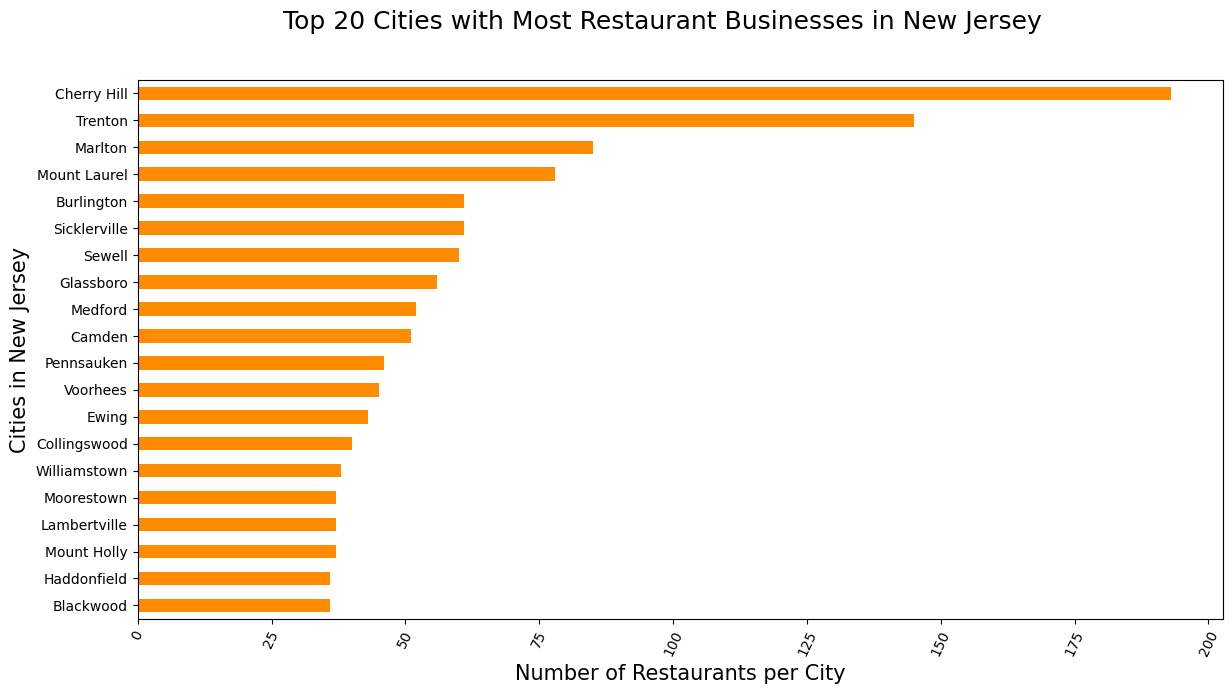

In [37]:
# Distribution of Cities with Most Restaurant Businesses in New Jersey

#business_on = business_food[business_food['state']=='ON']
arizona_cities = business_food['city']
top_cities = arizona_cities.value_counts().head(20)
top_cities.sort_values(inplace=True)

fig, ax = plt.subplots(figsize=(14, 7), )
fig.suptitle('Top 20 Cities with Most Restaurant Businesses in New Jersey', fontsize=18)

top_cities.plot(kind = 'barh', color= 'darkorange')

plt.ylabel('Cities in New Jersey', fontsize=15)
plt.xlabel('Number of Restaurants per City', fontsize=15)
plt.xticks(rotation=65)

In [38]:
# The dataset reveals that the top 20 cities possess a significantly larger volume of data compared to the remaining cities. 
# Hence, for the scope of this project, we will focus exclusively on these top 20 cities.

In [39]:
# DataFrame named 'business_food' containing restaurant business data

# Define the top 20 cities
top_20_cities = business_food['city'].value_counts().head(20).index.tolist()

# Filter for restaurant business data in the top 20 cities
business_final = business_food[business_food['city'].isin(top_20_cities)]

# Display the shape and the first few rows of the filtered DataFrame
print(business_final.shape)
business_final.head()


(1237, 12)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
73,8rb-3VYXE37IZix4yOdskw,Sharky's Sports Bar & Grill,Williamstown,NJ,2.5,29,"American (Traditional), Bars, Nightlife, Sport...",39.696801,-74.999821,1,08094,8rb-3VYXE37IZix4yOdskw
88,LhpPSrulqVeTyJeK2xydvQ,Fresh Fruits & Salads,Camden,NJ,4.5,6,"Juice Bars & Smoothies, Restaurants, Fruits & ...",39.946690,-75.123327,1,08102,LhpPSrulqVeTyJeK2xydvQ
167,Ms5xG8i4p80KSMcF3tt4ug,Sal DeForte's Ristorante,Ewing,NJ,4.0,52,"Italian, Restaurants",40.266888,-74.805657,1,08628,Ms5xG8i4p80KSMcF3tt4ug
415,Wt1W6qwCvna1KzIuJRJbwA,Tokyo Mandarin,Glassboro,NJ,4.0,88,"Japanese, Restaurants, Sushi Bars, Chinese",39.711938,-75.110967,1,08028,Wt1W6qwCvna1KzIuJRJbwA
552,SlLfWzeYOrVBxCd-0QILZQ,The Boiling House,Cherry Hill,NJ,4.0,238,"Cajun/Creole, Seafood, Noodles, Restaurants",39.899661,-74.953300,1,08003,SlLfWzeYOrVBxCd-0QILZQ


# Finalizing Restaurants Review Dataset

In [40]:
business_final['key'] = business_final.iloc[:,0]
reviews_final = restaurant_reviews[restaurant_reviews['business_id'].isin(business_final['key'])]
reviews_final = reviews_final.reset_index().iloc[:,1:]
print(reviews_final.shape)
reviews_final.head()

# Filtering the reviews dataset (‘restraurant_reviews’) to include only those reviews that corresponds to 
# businesses listed in the ‘business_final’ dataframe.

C:\Users\karan\AppData\Local\Temp\ipykernel_16104\3867913242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_final['key'] = business_final.iloc[:,0]


(76238, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,SlLfWzeYOrVBxCd-0QILZQ,FLGFtGbXaUo0obR6lnZA1Q,5.0,2,0,1,My 2nd experience here was even better than th...,2017-02-19 21:43:00,2017,02,21:43:00
1,sLgIenN5t-fFALQUkOvCyQ,tVMwKnashaK7V00XIRjtgw,5.0,1,0,0,We really liked this place. Everything we had ...,2018-02-01 22:44:20,2018,02,22:44:20
2,Wr2k0Vz8RbcumYulp-jIrA,MLjsIHbz1UWQ65wGSs0Cqw,5.0,0,0,0,I love this place...stop whenever I can; eithe...,2015-05-12 18:07:21,2015,05,18:07:21
3,hqm2zJ1WY5UaVGZ6j07NNA,mCWR0MzqZE3sKB0mwLjLTw,4.0,0,0,0,"Very impressed with this place, particularly t...",2016-07-03 17:36:30,2016,07,17:36:30
4,r43DrfYAbAgifsYyNkljZw,wLFuvZ59HGUJZ3QBgqlmAg,1.0,0,0,0,"For many years, RH&B was the place to go in so...",2018-09-25 13:10:02,2018,09,13:10:02


In [41]:
# We are now left with 77,557 rows of Yelp User Reviews Data for our 1254 Restaurant Businesses in NJ.

# Finalizing Restaurants Users Dataset

In [42]:
# Filtering for our final Yelp Users Dataset

reviews_final['key'] = reviews_final.iloc[:,1]
users_final = users_df[users_df['user_id'].isin(reviews_final['key'])]
users_final = users_final.reset_index().iloc[:,1:]
print(users_final.shape)
users_final.head()

# Filters user data based on users who have provided reviews for restaurants using ‘key’ column from ‘reviews_final’ dataframe and 
# displays the filtered user dataframe ‘users_final’ alongside the ‘reviews_final’ Dataframe.


(25271, 10)


,user_id,user_name,user_review_count,user_yelp_since,friends,useful_reviews,funny_reviews,cool_reviews,n_fans,average_stars
0,IpLRJY4CP3fXtlEd8Y4GFQ,Robyn,518,2009-04-11 14:35:46,"hdwDo7CLh9aN_9PckAos4Q, ci-mepWGgsgGT3sFI2mhMg...",1325,450,348,35,2.95
1,w-zD8Ln3XZszM82AfVrspg,Robin,90,2008-05-05 02:55:07,"RgDVC3ZUBqpEe6Y1kPhIpw, -Yuf4Ph_6DzKwDOudoRc_A...",137,36,66,5,4.11
2,KrIL3TIOJI-tjvU6BlcA-g,Elisabeth,141,2010-06-17 22:38:44,"eUlLKiRbX3k4VS3Ko_WxTA, nmiOEav_m5eT08zz8BIi4A...",225,58,83,18,4.22
3,I7YQFiIsO82eliq8nqsLfA,Michelle,885,2010-04-26 20:45:56,"sMIFUM1v-dxzO8_iPwVBKw, 3xFGPEzgK-WNlYnO2QOzdQ...",2501,485,767,50,3.84
4,2aYKApNwS5gi1XS_V6qYJg,Carmen,296,2008-05-15 23:30:56,"LQp6pJuzCBUM3UttQrV7-g, m8icmg4NnIVoEPUvNQpSbA...",628,113,120,22,3.50


In [43]:
# We are now left with 25464 unique active Yelp User Data for our 77,557 rows of Yelp User Reviews Data for our 1254 Restaurant Businesses in NJ.

In [44]:
# Saving Dataframes into CSV Files

In [45]:
# Save business_final into csv file

business_final.to_csv("E:/Pace/final/business_final.csv")

In [46]:
# Save reviews_final into csv file

reviews_final.to_csv("E:/Pace/final/reviews_final.csv")

In [47]:
# Save users_final into csv file

users_final.to_csv("E:/Pace/final/users_final.csv")

In [48]:
# EDA

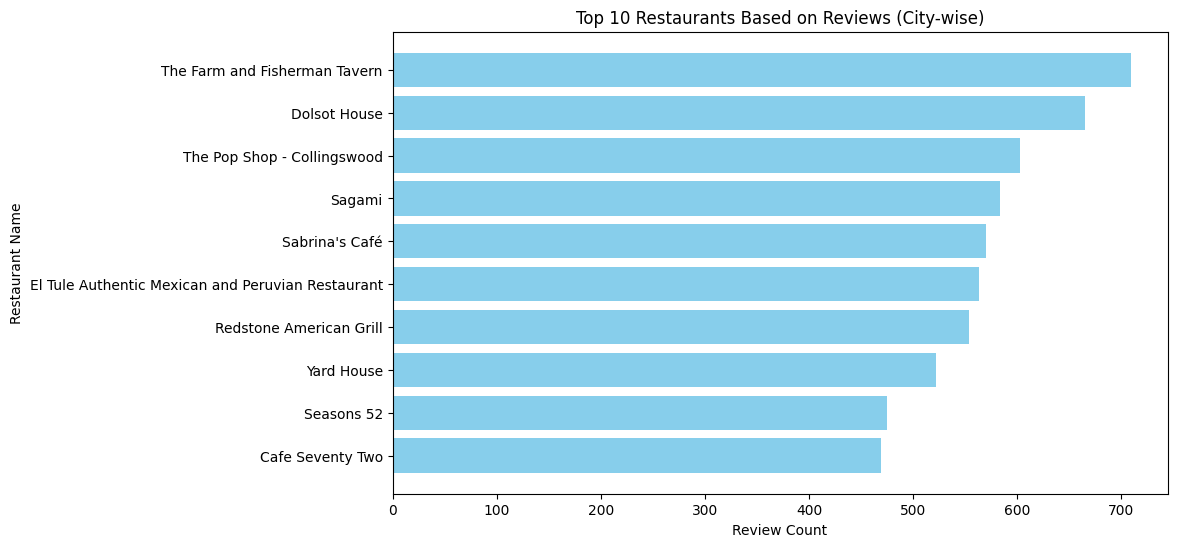

In [49]:
# Top 10 Restaurants Based on Reviews (City-wise)

business_final = pd.read_csv("E:/Pace/final/business_final.csv")

# Sort the DataFrame by review_count in descending order and select top 10 restaurants
top_10_restaurants = business_final.sort_values(by='review_count', ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_restaurants['name'], top_10_restaurants['review_count'], color='skyblue')
plt.xlabel('Review Count')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants Based on Reviews (City-wise)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

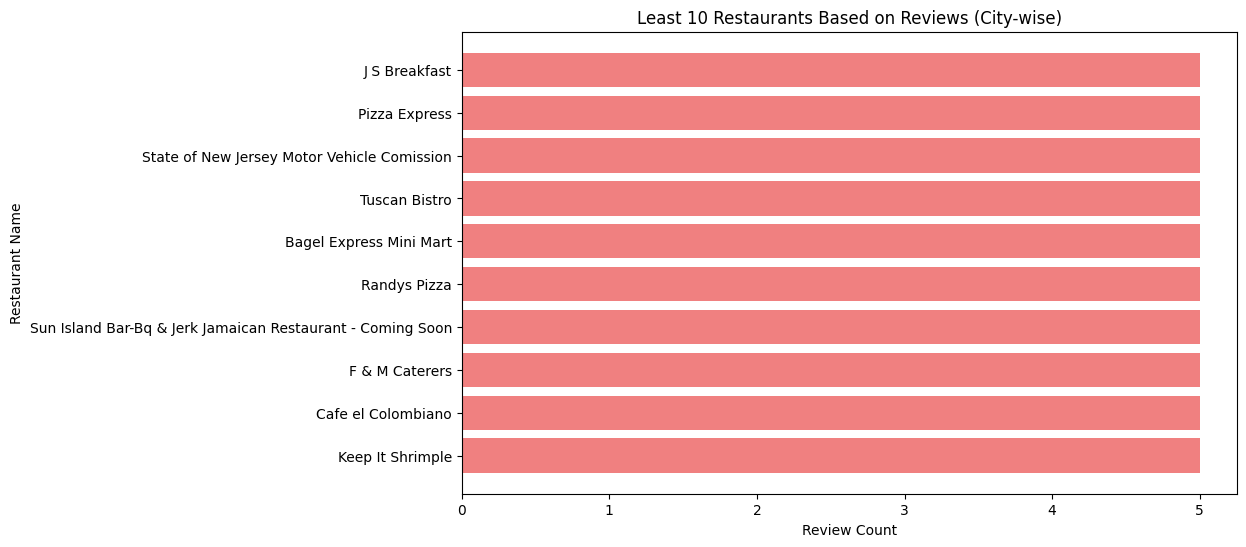

In [50]:
# Least 10 Restaurants Based on Reviews (City-wise)
least_10_restaurants = business_final.sort_values(by='review_count').head(10)

# Plotting the bar chart for least 10 restaurants
plt.figure(figsize=(10, 6))
plt.barh(least_10_restaurants['name'], least_10_restaurants['review_count'], color='lightcoral')
plt.xlabel('Review Count')
plt.ylabel('Restaurant Name')
plt.title('Least 10 Restaurants Based on Reviews (City-wise)')
plt.gca().invert_yaxis()  # Invert y-axis to display the lowest count at the top
plt.show()